<a href="https://colab.research.google.com/github/RubaEgbaria/ClassificationTechniques/blob/master/p2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM

# Part Two:
Draw the training error and validation error curves on one graph for each of the above algorithm as follows

A. First split your data into training set 70% and test set 30%

B. Use cross validation technique on train set to draw the training and validation error as follows

• Repeat the experiment 10 times, in first experiment use 10% of the training set for training and validation, in the second experiment used 20% of training set for training and validation and so on until the tenth experiment were use 100% of training set for training and validation.

• In each experiment divide the used set (i.e. the 10% or 20% .. or 100% of training set) into 10 folds where one-fold used for validation and the other 9-folds used for training, in which it will repeated 10 times each time record the training error and validation error and finally take the average for the training and validation

• After finishing the 10 experiments you will have 10 average values for training error and 10 average values for validation error

• Finally draw the training error curve and validation error curve with respect to training set size used in each experiment

• Show if overfitting or underfitting are appear in your algorithm if so, solve it and show the result after you solve it

• Compare the training error, validation error with test error for each algorithm algorithms

In [1]:
import pandas as pd

data = pd.read_csv('processedGlobalTerrorism.csv', encoding='latin-1', on_bad_lines='skip', engine='python')
data.head()

,eventid,extended,country,region,provstate,city,specificity,vicinity,doubtterr,alternative,...,related,date,weaponsCount,attackType,targetType,nationality,gunCertain,claimedMode,crit,weaponType
0,197000000001,False,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,0.00,False,False,NaN,...,NaN,1970-07-02,0.0,Assassination,Private Citizens & Property,Dominican Republic,0.0,Unknown,True,Unknown
1,197000000002,False,Mexico,North America,Federal,Mexico city,0.00,False,False,NaN,...,NaN,NaN,0.0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,0.0,Unknown,True,Unknown
2,197001000001,False,Philippines,Southeast Asia,Tarlac,Unknown,0.75,False,False,NaN,...,NaN,NaN,0.0,Assassination,Journalists & Media,United States,0.0,Unknown,True,Unknown
3,197001000002,False,Greece,Western Europe,Attica,Athens,0.00,False,False,NaN,...,NaN,NaN,0.0,Bombing/Explosion,Government (Diplomatic),United States,0.0,Unknown,True,Explosives
4,197001000003,False,Japan,East Asia,Fukouka,Fukouka,0.00,False,True,NaN,...,NaN,NaN,0.0,Facility/Infrastructure Attack,Government (Diplomatic),United States,0.0,Unknown,True,Incendiary


In [2]:
data.shape

(156328, 47)

In [3]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

y = data['attackType']
x = data.drop('attackType', axis=1)

# A. First split your data into training set 70% and test set 30%
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
# encode the data
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numCols = xTrain.select_dtypes(include=['int64', 'float64']).columns
catCols = xTrain.select_dtypes(include=['object']).columns

xTrain[catCols] = xTrain[catCols].astype('category')
xTest[catCols] = xTest[catCols].astype('category')

numericalPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categoricalPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numericalPipeline, numCols),
        ('cat', categoricalPipeline, catCols)
    ])

xTrainEncoded = preprocessor.fit_transform(xTrain)
xTestEncoded = preprocessor.transform(xTest)

In [5]:
import numpy as np
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt

def plotLearningCurve(model, xTrain, yTrain, modelName):
    trainSizes, trainScores, valScores = learning_curve(
        estimator=model,
        X=xTrain,
        y=yTrain,
        train_sizes=np.linspace(0.1, 1.0, 10),  # 10%, 20%, ..., 100%
        cv=10,  # 10-fold cross-validation
        scoring='accuracy',
        n_jobs=-1,  # Parallel
        random_state=42
    )

    #  mean
    trainErrors = 1 - np.mean(trainScores, axis=1)
    valErrors = 1 - np.mean(valScores, axis=1)

    # visualization
    plt.figure(figsize=(10, 6))
    plt.plot(trainSizes, trainErrors, 'o-', label='Training Error')
    plt.plot(trainSizes, valErrors, 'o-', label='Validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error (1 - Accuracy)')
    plt.title('Learning Curves for ' + modelName)
    plt.legend()
    plt.grid()
    plt.show()

    return trainErrors, valErrors

In [6]:
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler

# # save for future comparision
# modelResults = {
#     'SVM': {'trainErrors': [], 'valErrors': [], 'testError': None},
# }

# scaler = StandardScaler(with_mean=False)
# xTrainScaled = scaler.fit_transform(xTrainEncoded)
# xTestScaled = scaler.transform(xTestEncoded)

# svm = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
# svm.fit(xTrainScaled, yTrain)

# # Generate learning curves
# trainErrors, valErrors = plotLearningCurve(svm, xTrainScaled, yTrain, "SVM")

# # save result
# modelResults['SVM']['trainErrors'] = trainErrors
# modelResults['SVM']['valErrors'] = valErrors

# # Print results
# print(f"Final Training Error: {trainErrors[-1]:.4f}")
# print(f"Final Validation Error: {valErrors[-1]:.4f}")

# if modelResults['KNN']['testError'] > 0.3:
#     print("Model may need improvement (high error)")
# else:
#     print("Model performance looks good")

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


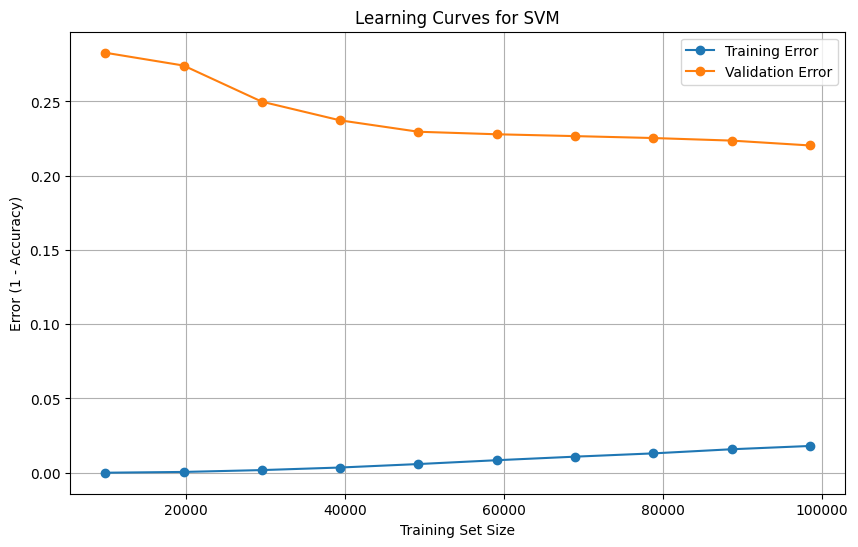

Final Training Error: 0.0180
Final Validation Error: 0.2203
Model performance looks good


In [7]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

modelResults = {
    'SVM': {'trainErrors': [], 'valErrors': [], 'testError': None},
}

scaler = StandardScaler(with_mean=False)
xTrainScaled = scaler.fit_transform(xTrainEncoded)
xTestScaled = scaler.transform(xTestEncoded)

svm = LinearSVC(penalty='l2', C=1.0, loss='squared_hinge',
                dual=False, random_state=42, max_iter=1000)

svm.fit(xTrainScaled, yTrain)

trainErrors, valErrors = plotLearningCurve(svm, xTrainScaled, yTrain, "SVM")

# save result
modelResults['SVM']['trainErrors'] = trainErrors
modelResults['SVM']['valErrors'] = valErrors

# Print results
print(f"Final Training Error: {trainErrors[-1]:.4f}")
print(f"Final Validation Error: {valErrors[-1]:.4f}")

if modelResults['SVM']['valErrors'][-1] > 0.3:
    print("Model may need improvement (high error)")
else:
    print("Model performance looks good")